- apple width ≈ 6 cm
- apple lengh ≈ 6 cm
- banana width ≈ 4 cm
- anana lengh ≈ 8 cm

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [6]:
def generate_dataset(n):
    apple_width = np.random.normal(6 , 1  , n)
    apple_length = np.random.normal(6 , 1  , n)

    banana_width = np.random.normal(4 , 1  , n )
    banana_length = np.random.normal(8 , 1  , n)

    width = np.concatenate((apple_width , banana_width))
    length = np.concatenate((apple_length , banana_length))
    X = np.array([width , length]).transpose()

    Y_apples  = np.zeros(n , dtype=int)
    Y_bananas = np.ones(n , dtype=int)
    Y = np.concatenate((Y_apples , Y_bananas))


    return X , Y 


In [7]:
X_train, Y_train = generate_dataset(100)

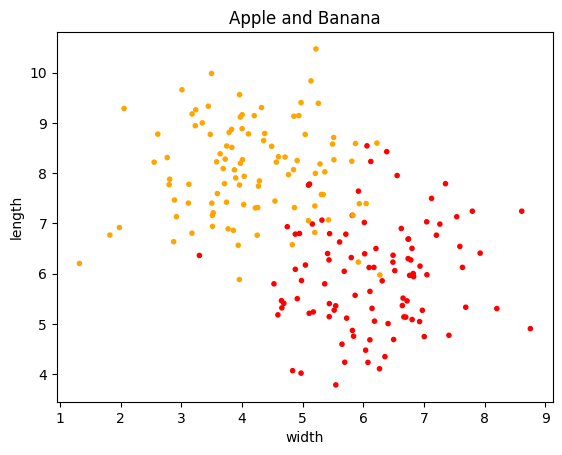

In [8]:
cmap = ['red', 'orange']
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=ListedColormap(cmap), marker='.')
plt.title('Apple and Banana')
plt.xlabel('width')
plt.ylabel('length')
plt.show()

In [21]:
class KNN:
    def __init__(self,k):
        self.k=k
    
    # training
    def fit(self,x,Y):
        self.X_train=x
        self.Y_train=Y

    def euclidean_distance(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))

    def predict(self, list_x):
        list_y=[]
        for x in list_x:
            distances=[]
            for x_train in X_train:
                d=self.euclidean_distance(x, x_train)
                distances.append(d)
            
            nearest_neighbores=np.argsort(distances)[0:self.k]
            result=np.bincount(self.Y_train[nearest_neighbores])
            y=np.argmax(result)
            list_y.append(y)

            return list_y
        
    def evaluate(self, X, Y):
        Y_pred = self.predict(X)
        accuracy = np.sum(Y_pred ==Y)/ len(Y)
        return accuracy

In [22]:
#Learning Pgase(fitting)
knn = KNN(k=5)
knn.fit(X_train, Y_train)

In [23]:
new_fruit=np.array([6,8])
new_fruit_2=np.array([3,6])
new_fruit_3=np.array([4,7])
new_fruits=[new_fruit,new_fruit_2,new_fruit_3]
outputs=knn.predict(new_fruits)

In [24]:
for output in outputs:
    if output == 0:
        print('apple')
    else:
        print('banana')

apple


In [ ]:
# Test Phase
X_test, Y_test = generate_dataset(50)
X_test

In [43]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
knn.evaluate(X_test, Y_test)

0.5

In [45]:
X_test, Y_test = generate_dataset(90)
knn.evaluate(X_test, Y_test)

0.5

In [41]:
Y_prediction = knn.predict(X_test)
Y_prediction

[0]

In [46]:
# Confusion matrix
confusion_matrix = np.zeros((2,2))

for i in range(180): 
    if Y_test[i] == 0 and Y_prediction[i] == 0 : 
        confusion_matrix[0][0] += 1
    elif Y_test[i] == 0 and Y_prediction[i] == 1 :     
        confusion_matrix[0][1] += 1
    elif Y_test[i] == 1 and Y_prediction[i] == 0  :  
        confusion_matrix[1][0] += 1
    elif Y_test[i] == 1 and Y_prediction[i] == 1 :    
        confusion_matrix[1][1] += 1 

confusion_matrix

IndexError: list index out of range

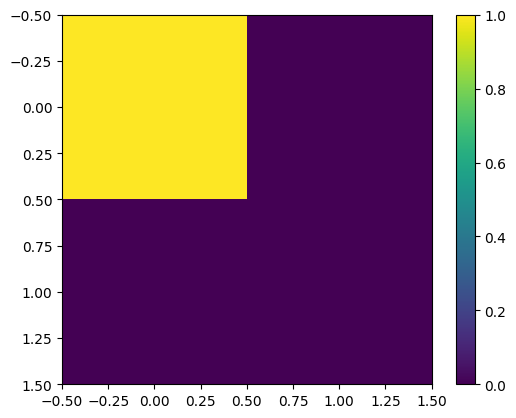

In [47]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

In [ ]:
from sklearn.neighbors import KNneighborsClassifier

knn - KNneighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

knn.predict(new_fruits)

In [ ]:
knn.score(X_test, Y_test)